In [156]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.utils.class_weight import compute_class_weight
import matplotlib as plt
import string
import nltk
import ssl
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

PART 1: CLASSIFY POSITIVITY/NEGATIVITY OF COMMENT

In [157]:
amazon_ds = pd.read_csv('amazon_cells_labelled.txt',names=['sentence','label'], sep='\t')
yelp_ds = pd.read_csv('yelp_labelled.txt',names=['sentence','label'], sep='\t')
imdb_ds = pd.read_csv('imdb_labelled.txt',names=['sentence','label'], sep='\t')
                        
                        

In [158]:
amazon_ds.head()

,sentence,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [159]:
yelp_ds.head()


,sentence,label
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [160]:
imdb_ds.head()

,sentence,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [161]:
ds_reviews = [amazon_ds,yelp_ds,imdb_ds]
dataset=pd.concat(ds_reviews)

In [162]:
dataset

,sentence,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


Now we convert corpus to lowercase

In [163]:
dataset['reviews']=dataset.loc[:,'sentence'].str.lower()
dataset

,sentence,label,reviews
0,So there is no way for me to plug it in here i...,0,so there is no way for me to plug it in here i...
1,"Good case, Excellent value.",1,"good case, excellent value."
2,Great for the jawbone.,1,great for the jawbone.
3,Tied to charger for conversations lasting more...,0,tied to charger for conversations lasting more...
4,The mic is great.,1,the mic is great.
...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,i just got bored watching jessice lange take h...
744,"Unfortunately, any virtue in this film's produ...",0,"unfortunately, any virtue in this film's produ..."
745,"In a word, it is embarrassing.",0,"in a word, it is embarrassing."
746,Exceptionally bad!,0,exceptionally bad!


Now we Remove the punctuation from the sentences

In [164]:
punct = string.punctuation
print(punct)

def remove_punctuations(text):
    return text.translate(str.maketrans(' ',' ',punct))

dataset['reviews_punct_removed']=dataset['reviews'].apply(remove_punctuations)
dataset

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


,sentence,label,reviews,reviews_punct_removed
0,So there is no way for me to plug it in here i...,0,so there is no way for me to plug it in here i...,so there is no way for me to plug it in here i...
1,"Good case, Excellent value.",1,"good case, excellent value.",good case excellent value
2,Great for the jawbone.,1,great for the jawbone.,great for the jawbone
3,Tied to charger for conversations lasting more...,0,tied to charger for conversations lasting more...,tied to charger for conversations lasting more...
4,The mic is great.,1,the mic is great.,the mic is great
...,...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,i just got bored watching jessice lange take h...,i just got bored watching jessice lange take h...
744,"Unfortunately, any virtue in this film's produ...",0,"unfortunately, any virtue in this film's produ...",unfortunately any virtue in this films product...
745,"In a word, it is embarrassing.",0,"in a word, it is embarrassing.",in a word it is embarrassing
746,Exceptionally bad!,0,exceptionally bad!,exceptionally bad


Loading stopwords

In [165]:
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shreiks16/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Removing stopwords

In [166]:
stopwords_list = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in str(text).split() if word not in stopwords_list])
dataset['reviews_wo_stopwords'] = dataset['reviews_punct_removed'].apply(remove_stopwords)
dataset

,sentence,label,reviews,reviews_punct_removed,reviews_wo_stopwords
0,So there is no way for me to plug it in here i...,0,so there is no way for me to plug it in here i...,so there is no way for me to plug it in here i...,way plug us unless go converter
1,"Good case, Excellent value.",1,"good case, excellent value.",good case excellent value,good case excellent value
2,Great for the jawbone.,1,great for the jawbone.,great for the jawbone,great jawbone
3,Tied to charger for conversations lasting more...,0,tied to charger for conversations lasting more...,tied to charger for conversations lasting more...,tied charger conversations lasting 45 minutesm...
4,The mic is great.,1,the mic is great.,the mic is great,mic great
...,...,...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,i just got bored watching jessice lange take h...,i just got bored watching jessice lange take h...,got bored watching jessice lange take clothes
744,"Unfortunately, any virtue in this film's produ...",0,"unfortunately, any virtue in this film's produ...",unfortunately any virtue in this films product...,unfortunately virtue films production work los...
745,"In a word, it is embarrassing.",0,"in a word, it is embarrassing.",in a word it is embarrassing,word embarrassing
746,Exceptionally bad!,0,exceptionally bad!,exceptionally bad,exceptionally bad


In [167]:
dataset.drop(['sentence', 'reviews', 'reviews_punct_removed'], axis=1, inplace=True)
dataset.columns=['Label','Reviews_final']
dataset

,Label,Reviews_final
0,0,way plug us unless go converter
1,1,good case excellent value
2,1,great jawbone
3,0,tied charger conversations lasting 45 minutesm...
4,1,mic great
...,...,...
743,0,got bored watching jessice lange take clothes
744,0,unfortunately virtue films production work los...
745,0,word embarrassing
746,0,exceptionally bad


Now that we have finished preprocessing we will split the dataset into training and testing sets

In [168]:
x = dataset['Reviews_final'].values
y = dataset['Label'].values
training_data,testing_data, label_train, label_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [169]:
print(training_data.shape)
print(testing_data.shape)

(2061,)
(687,)


In [170]:
vectorizer = TfidfVectorizer()
vectorizer.fit(training_data)

review_train = vectorizer.transform(training_data)
review_test = vectorizer.transform(testing_data)
print(review_train.shape)
print(review_test.shape)
review_train

(2061, 4374)
(687, 4374)


<2061x4374 sparse matrix of type '<class 'numpy.float64'>'
	with 13211 stored elements in Compressed Sparse Row format>

In [171]:
classifier = LogisticRegression()
classifier.fit(review_train,label_train)

LogisticRegression()

In [172]:
predictions = classifier.predict(review_test)
predictions

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

Here we can see the results with the review data side by side

In [173]:
Pos_Neg_Result= pd.DataFrame({'Reviews':testing_data, 'Predictions':predictions})
Pos_Neg_Result

,Reviews,Predictions
0,attractive set used throughout film eyepleasin...,1
1,one worst films ever seen,0
2,bathroom next door nice,1
3,going since 2007 every meal awesome,1
4,acting like watching wooden puppets moving aro...,0
...,...,...
682,voice quality signal strength dropped calls,0
683,utterly confusing first caused lose couple imp...,0
684,would take long describe bad customer service ...,0
685,interesting decor,1


In [174]:
accuracy = classifier.score(review_test, label_test)
print('Accuracy: ',accuracy)

Accuracy:  0.8311499272197962


We get an Accuracy of 83% in classifying the data

In [175]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       364
           1       0.81      0.83      0.82       323

    accuracy                           0.83       687
   macro avg       0.83      0.83      0.83       687
weighted avg       0.83      0.83      0.83       687



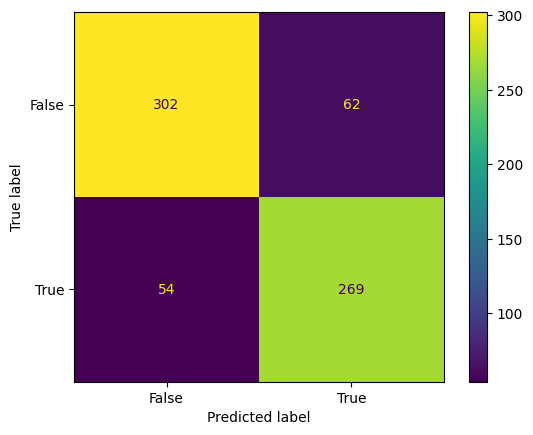

In [176]:
confusion_matrix = metrics.confusion_matrix(label_test, predictions)

cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_plot.plot()


PART 2: CLASSIFY TOXICITY LEVEL OF COMMENT

We will first write the function that creates the tfidf and logistic regression pipeline and returns the prediction set for each class

In [177]:
def train_and_predict_toxic_class(train_text, test_text, train_label, test_label, toxic_class, class_weights):
    weighted_pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('classifier', LogisticRegression(max_iter=1000, class_weight={0: class_weights[0], 1: class_weights[1]}))
    ])

    weighted_pipeline.fit(train_text, train_label)

    predictions = weighted_pipeline.predict(test_text)

    accuracy = accuracy_score(test_label, predictions)
    print(f"Accuracy for {toxic_class}: {accuracy:.2f}")

    return weighted_pipeline, predictions

Next we will load our comment data and then split it into training and testing sets and also create an 
empty dataset to store our final predictions

In [178]:
df = pd.read_csv('comments.csv')

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

final_predictions = pd.DataFrame()

Now we will iterate through each toxic class and balance the weights to obtain a balanced dataset to avoid skews in our accuracy

In [179]:
for toxic_class in ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']:
    
    train_label = train_df[toxic_class]
    test_label = test_df[toxic_class]

    # Compute class weights to balance dataset
    class_weights = compute_class_weight('balanced', classes=[0, 1], y=train_label)

    # Call the function and unpack the returned values
    trained_pipeline, predictions = train_and_predict_toxic_class(
        train_df['comment_text'], test_df['comment_text'], train_label, test_label, toxic_class, class_weights
    )

    # Store the trained pipeline for later use if needed
    final_predictions[toxic_class] = predictions

print("\nFinal Predictions:")
print(final_predictions.head())

Accuracy for toxic: 0.93
Accuracy for severe_toxic: 0.97
Accuracy for obscene: 0.96
Accuracy for threat: 0.99
Accuracy for insult: 0.95
Accuracy for identity_hate: 0.96

Final Predictions:
   toxic  severe_toxic  obscene  threat  insult  identity_hate
0      1             0        0       0       1              0
1      0             0        0       0       0              0
2      0             0        0       0       0              0
3      0             0        0       0       0              0
4      0             0        0       0       0              0


We Notice that there is good accuracies for all toxic classes. Now we will plot some visualisations on our data to better understand our results

First we will plot a distribution on the number of comments per toxic class

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


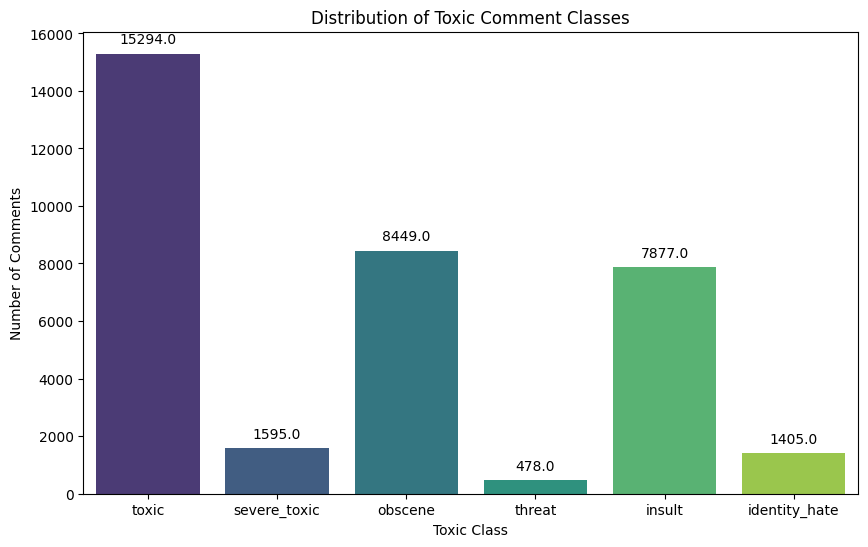

In [180]:
def plot_toxicity_class_distribution(df):
    plt.figure(figsize=(10, 6))
    toxic_class_counts = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum()
    ax = sns.barplot(x=toxic_class_counts.index, y=toxic_class_counts.values, hue=toxic_class_counts.index, palette='viridis', dodge=False)  # Adjust 'palette' as needed
    plt.title('Distribution of Toxic Comment Classes')
    plt.ylabel('Number of Comments')

    ax.set(xlabel='Toxic Class', ylabel='Number of Comments')

    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

    ax.legend().set_visible(False)

    plt.show()

plot_toxicity_class_distribution(df)




Next we will plot a distribution for the most occuring words across each toxic class

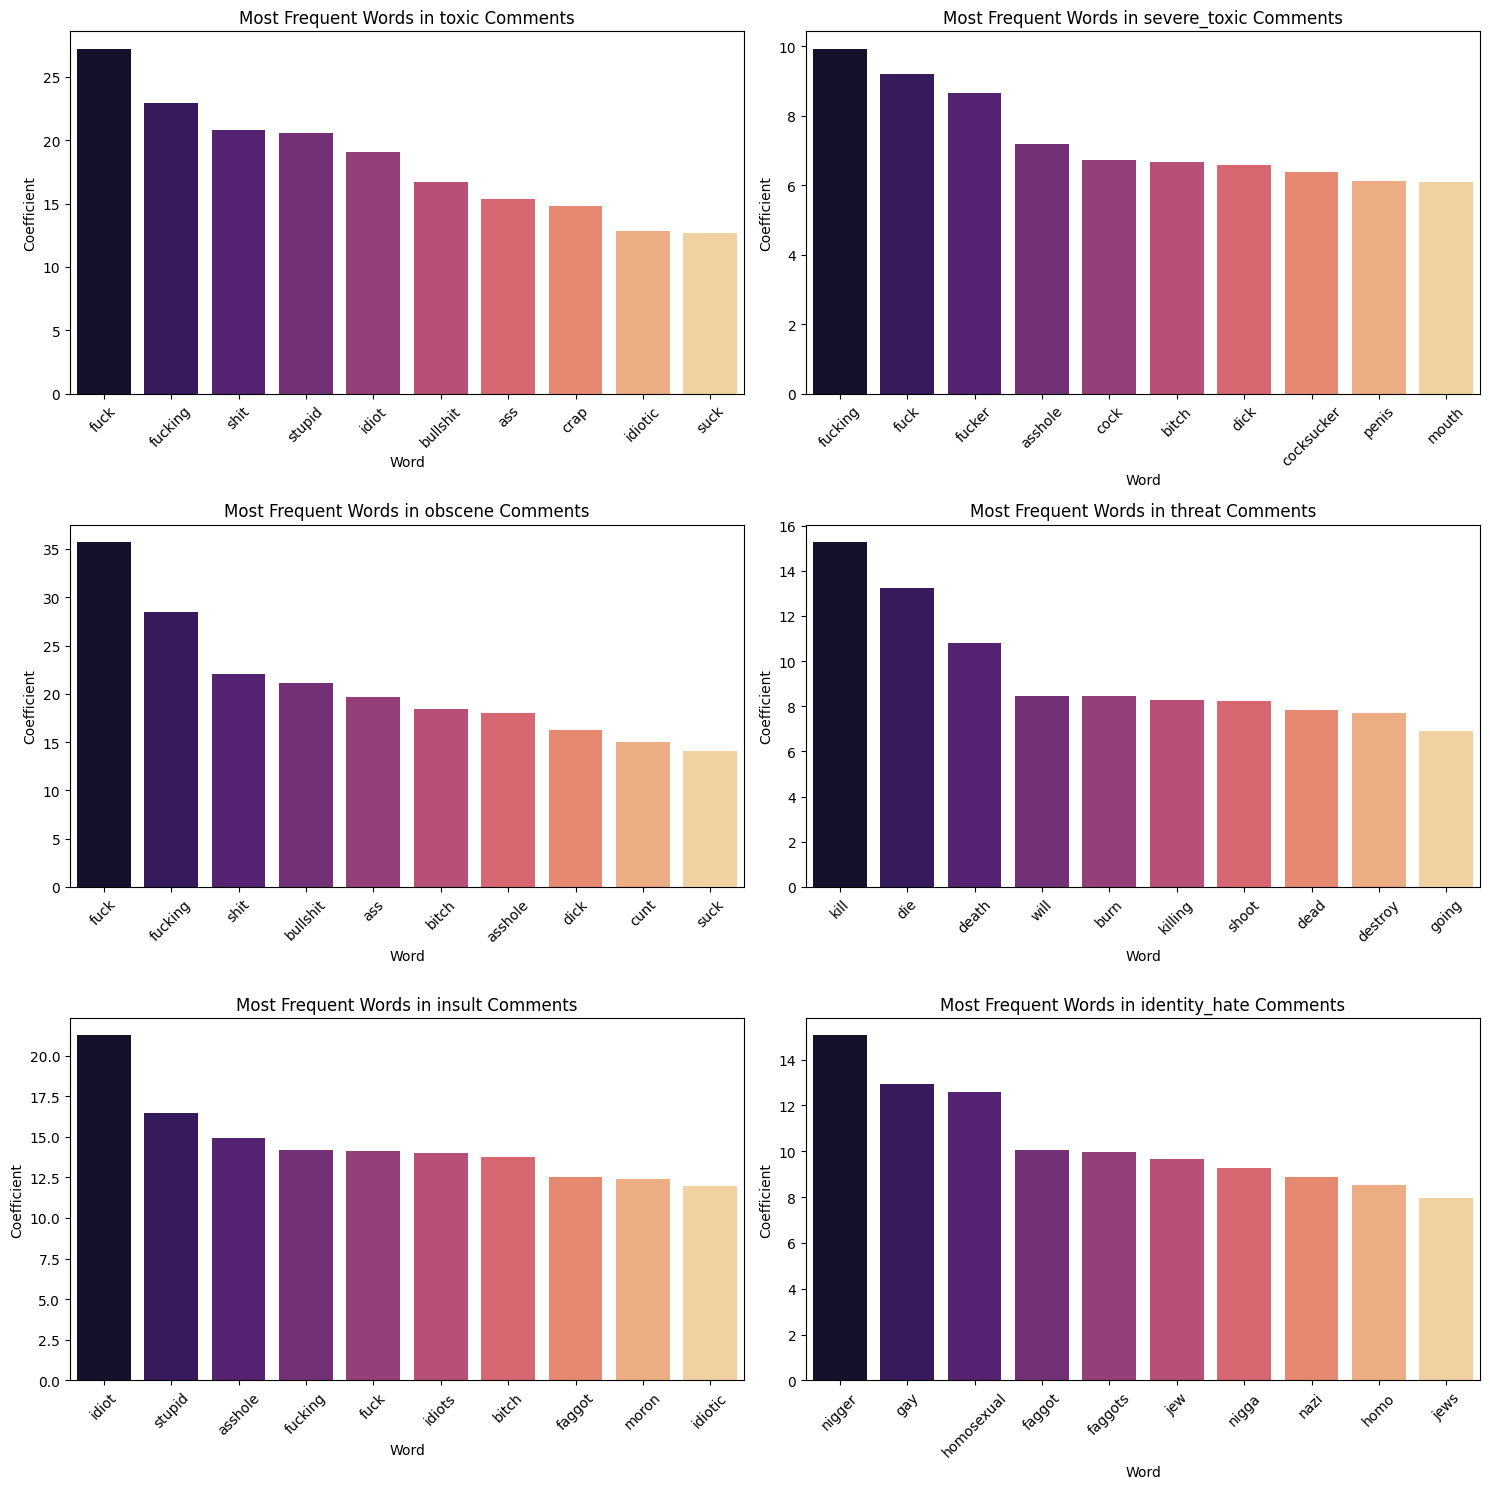

In [181]:
def plot_most_frequent_words(text, toxic_labels, class_weights):
    tfidf_vectorizer = TfidfVectorizer(max_features=5000)
    weighted_pipeline = Pipeline([
        ('tfidf', tfidf_vectorizer),
        ('classifier', LogisticRegression(max_iter=1000, class_weight={0: class_weights[0], 1: class_weights[1]}))
    ])

    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

    axes = axes.flatten()

    for i, toxic_class in enumerate(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']):

        train_label = toxic_labels[toxic_class]

        weighted_pipeline.fit(text, train_label)

        feature_names = tfidf_vectorizer.get_feature_names_out()
        coefficients = weighted_pipeline.named_steps['classifier'].coef_

        # Identify the top N words
        top_n = 10

        custom_palette = sns.color_palette('magma', n_colors=top_n)

        class_coefficients = coefficients[0] 

        top_coef_indices = class_coefficients.argsort()[-top_n:][::-1]
        top_words = [feature_names[index] for index in top_coef_indices]

        sns.barplot(x=top_words, y=class_coefficients[top_coef_indices], hue=top_words, ax=axes[i], legend= False,palette=custom_palette)
        axes[i].set_title(f'Most Frequent Words in {toxic_class} Comments')
        axes[i].set_xlabel('Word')
        axes[i].set_ylabel('Coefficient')
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()

    plt.show()

toxic_labels = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]


plot_most_frequent_words(df['comment_text'], toxic_labels, class_weights)


PART 3: APPLYING THE POS_NEG MODEL AND TOXICITY MODEL ON LIVE TWITTER TWEETS

In [182]:
livetweet = pd.read_csv('livetweet.csv')
livetweet

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


Now we perform Preprocessing on the scraped tweets which includes all the lower case conversion
Stemming, lemmatization, removing stopwords and so on

In [183]:
livetweet['tweets']=livetweet.loc[:,'comment_text'].str.lower()
livetweet

,id,comment_text,tweets
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,== from rfc == \n\n the title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",""" \n\n == sources == \n\n * zawe ashton on lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in...",":if you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.,i don't anonymously edit articles at all.
...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,== throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",""" \n\n == okinotorishima categories == \n\n i ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",""" \n\n == """"one of the founding nations of the..."


In [184]:
punct = string.punctuation
print(punct)

def remove_punctuations(text):
    return text.translate(str.maketrans(' ',' ',punct))

livetweet['tweets_punct_removed']=livetweet['tweets'].apply(remove_punctuations)
livetweet

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


,id,comment_text,tweets,tweets_punct_removed
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule is more succesful then you'll...,yo bitch ja rule is more succesful then youll ...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,== from rfc == \n\n the title is fine as it is...,from rfc \n\n the title is fine as it is imo
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",""" \n\n == sources == \n\n * zawe ashton on lap...",\n\n sources \n\n zawe ashton on lapland —...
3,00017563c3f7919a,":If you have a look back at the source, the in...",":if you have a look back at the source, the in...",if you have a look back at the source the info...
4,00017695ad8997eb,I don't anonymously edit articles at all.,i don't anonymously edit articles at all.,i dont anonymously edit articles at all
...,...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",". \n i totally agree, this stuff is nothing bu...",\n i totally agree this stuff is nothing but ...
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,== throw from out field to home plate. == \n\n...,throw from out field to home plate \n\n does...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",""" \n\n == okinotorishima categories == \n\n i ...",\n\n okinotorishima categories \n\n i see y...
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",""" \n\n == """"one of the founding nations of the...",\n\n one of the founding nations of the eu ...


In [185]:
stopwords_list = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in str(text).split() if word not in stopwords_list])
livetweet['tweets_wo_stopwords'] = livetweet['tweets_punct_removed'].apply(remove_stopwords)
livetweet

,id,comment_text,tweets,tweets_punct_removed,tweets_wo_stopwords
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule is more succesful then you'll...,yo bitch ja rule is more succesful then youll ...,yo bitch ja rule succesful youll ever whats ha...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,== from rfc == \n\n the title is fine as it is...,from rfc \n\n the title is fine as it is imo,rfc title fine imo
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",""" \n\n == sources == \n\n * zawe ashton on lap...",\n\n sources \n\n zawe ashton on lapland —...,sources zawe ashton lapland —
3,00017563c3f7919a,":If you have a look back at the source, the in...",":if you have a look back at the source, the in...",if you have a look back at the source the info...,look back source information updated correct f...
4,00017695ad8997eb,I don't anonymously edit articles at all.,i don't anonymously edit articles at all.,i dont anonymously edit articles at all,dont anonymously edit articles
...,...,...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",". \n i totally agree, this stuff is nothing bu...",\n i totally agree this stuff is nothing but ...,totally agree stuff nothing toolongcrap
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,== throw from out field to home plate. == \n\n...,throw from out field to home plate \n\n does...,throw field home plate get faster throwing cut...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",""" \n\n == okinotorishima categories == \n\n i ...",\n\n okinotorishima categories \n\n i see y...,okinotorishima categories see changes agree co...
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",""" \n\n == """"one of the founding nations of the...",\n\n one of the founding nations of the eu ...,one founding nations eu germany law return qui...


In [186]:
livetweet.drop(['id', 'comment_text', 'tweets_punct_removed','tweets'], axis=1, inplace=True)
livetweet.columns=['Tweets_final']
livetweet

,Tweets_final
0,yo bitch ja rule succesful youll ever whats ha...
1,rfc title fine imo
2,sources zawe ashton lapland —
3,look back source information updated correct f...
4,dont anonymously edit articles
...,...
153159,totally agree stuff nothing toolongcrap
153160,throw field home plate get faster throwing cut...
153161,okinotorishima categories see changes agree co...
153162,one founding nations eu germany law return qui...


Predict the positivity/negativity of the tweet

In [187]:
x = livetweet['Tweets_final'].values
tweet_test = vectorizer.transform(x)
tweet_pred_posneg= classifier.predict(tweet_test)
livetweet= pd.DataFrame({'Tweet':x, 'Predictions':tweet_pred_posneg})
livetweet


,Tweet,Predictions
0,yo bitch ja rule succesful youll ever whats ha...,0
1,rfc title fine imo,1
2,sources zawe ashton lapland —,0
3,look back source information updated correct f...,0
4,dont anonymously edit articles,0
...,...,...
153159,totally agree stuff nothing toolongcrap,0
153160,throw field home plate get faster throwing cut...,1
153161,okinotorishima categories see changes agree co...,0
153162,one founding nations eu germany law return qui...,0


Remove all positive tweets, only keep the negative ones for toxicity prediction

In [188]:
filtered_livetweet = livetweet[livetweet['Predictions'] == 0]
filtered_livetweet

,Tweet,Predictions
0,yo bitch ja rule succesful youll ever whats ha...,0
2,sources zawe ashton lapland —,0
3,look back source information updated correct f...,0
4,dont anonymously edit articles,0
6,please add nonsense wikipedia edits considered...,0
...,...,...
153157,disagree soviet railways need article administ...,0
153158,idiot cant even use proper grammar hijacking page,0
153159,totally agree stuff nothing toolongcrap,0
153161,okinotorishima categories see changes agree co...,0


Predict toxicity of the Tweets

In [198]:
def train_and_predict_toxic_class(train_text, test_text, train_label, test_label, toxic_class, class_weights):
    weighted_pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('classifier', LogisticRegression(max_iter=1000, class_weight={0: class_weights[0], 1: class_weights[1]}))
    ])

    weighted_pipeline.fit(train_text, train_label)

    predictions = weighted_pipeline.predict(test_text)

    return predictions

In [199]:
df = pd.read_csv('comments.csv')

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

final_predictions = pd.DataFrame()

In [204]:
for toxic_class in ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']:
    
    train_label = train_df[toxic_class]
    test_label = test_df[toxic_class]

    # Compute class weights to balance dataset
    class_weights = compute_class_weight('balanced', classes=[0, 1], y=train_label)

    # Call the function and unpack the returned values
    predictions = train_and_predict_toxic_class(
        train_df['comment_text'], livetweet['Tweet'], train_label, test_label, toxic_class, class_weights
    )

    # Store the trained pipeline for later use if needed
    final_predictions[toxic_class] = predictions

print("\nFinal Predictions:")
print(final_predictions)



Final Predictions:
        toxic  severe_toxic  obscene  threat  insult  identity_hate
0           1             1        1       1       1              1
1           0             0        0       0       0              0
2           0             0        0       0       0              0
3           0             0        0       0       0              0
4           0             0        0       0       0              0
...       ...           ...      ...     ...     ...            ...
153159      0             0        0       0       0              0
153160      0             0        0       0       0              0
153161      0             0        0       0       0              0
153162      0             0        0       0       0              1
153163      1             0        1       0       1              0

[153164 rows x 6 columns]


Store final result in csv

In [207]:
toxic_classes = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Create a DataFrame with 'Tweet' column from livetweet and predictions for all toxic classes
final_tweet_result = pd.DataFrame({'Tweet': livetweet['Tweet']})
for toxic_class in toxic_classes:
    final_tweet_result[toxic_class] = final_predictions[toxic_class]

In [209]:
final_tweet_result
final_tweet_result.to_csv("predictions.csv")